In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

np.random.seed(1337)
from timeit import timeit

import matplotlib
import matplotlib.pyplot as plt

### Well-conditioned linear regression

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 5, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

# eta = 1/s**2
# print(eta)

4.999999999999995


In [3]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [4]:
def HB(y, A, eta, beta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_prev = x_cur
        x_cur = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_cur)
    
        # Perform gradient step
        x_new = x_cur - eta * grad + beta * (x_cur - x_prev)
    
        if (la.norm(x_new - x_cur, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_cur, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 1.2104208087616735
iter# = 1, ||x_new - x_old||_2 = 1.1287417485141047
iter# = 2, ||x_new - x_old||_2 = 1.3775275495438268
iter# = 3, ||x_new - x_old||_2 = 1.805518230632292
iter# = 4, ||x_new - x_old||_2 = 2.444864322584217
iter# = 5, ||x_new - x_old||_2 = 3.3722006594829805
iter# = 6, ||x_new - x_old||_2 = 4.706800401465975
iter# = 7, ||x_new - x_old||_2 = 6.624557345849534
iter# = 8, ||x_new - x_old||_2 = 9.381909186739366
iter# = 9, ||x_new - x_old||_2 = 13.351801921721165
iter# = 10, ||x_new - x_old||_2 = 19.076591109303568
iter# = 11, ||x_new - x_old||_2 = 27.34550749941281
iter# = 12, ||x_new - x_old||_2 = 39.30801294757236
iter# = 13, ||x_new - x_old||_2 = 56.639716715885164
iter# = 14, ||x_new - x_old||_2 = 81.78534762875219
iter# = 15, ||x_new - x_old||_2 = 118.31477359446684
iter# = 16, ||x_new - x_old||_2 = 171.44496755793472
iter# = 17, ||x_new - x_old||_2 = 248.80570025032546
iter# = 18, ||x_new - x_old||_2 = 361.5633720274706
iter# = 19, 

iter# = 194, ||x_new - x_old||_2 = 5.106247587066621e+32
iter# = 195, ||x_new - x_old||_2 = 7.609769652755038e+32
iter# = 196, ||x_new - x_old||_2 = 1.1340972328492275e+33
iter# = 197, ||x_new - x_old||_2 = 1.6902002506120403e+33
iter# = 198, ||x_new - x_old||_2 = 2.519040079692784e+33
iter# = 199, ||x_new - x_old||_2 = 3.754403894695513e+33
iter# = 200, ||x_new - x_old||_2 = 5.595718497704695e+33
iter# = 201, ||x_new - x_old||_2 = 8.340260808424755e+33
iter# = 202, ||x_new - x_old||_2 = 1.243117744421616e+34
iter# = 203, ||x_new - x_old||_2 = 1.8529073956701723e+34
iter# = 204, ||x_new - x_old||_2 = 2.761874456168555e+34
iter# = 205, ||x_new - x_old||_2 = 4.1168294550166766e+34
iter# = 206, ||x_new - x_old||_2 = 6.136637897302547e+34
iter# = 207, ||x_new - x_old||_2 = 9.147591304737187e+34
iter# = 208, ||x_new - x_old||_2 = 1.363614456472723e+35
iter# = 209, ||x_new - x_old||_2 = 2.0327547480715807e+35
iter# = 210, ||x_new - x_old||_2 = 3.0303086827269825e+35
iter# = 211, ||x_new - x_

iter# = 387, ||x_new - x_old||_2 = 1.864373535812796e+66
iter# = 388, ||x_new - x_old||_2 = 2.785224598177913e+66
iter# = 389, ||x_new - x_old||_2 = 4.160929344073494e+66
iter# = 390, ||x_new - x_old||_2 = 6.21617555006442e+66
iter# = 391, ||x_new - x_old||_2 = 9.286648223963681e+66
iter# = 392, ||x_new - x_old||_2 = 1.387386606160421e+67
iter# = 393, ||x_new - x_old||_2 = 2.0727110507552136e+67
iter# = 394, ||x_new - x_old||_2 = 3.096583357409815e+67
iter# = 395, ||x_new - x_old||_2 = 4.626254487803035e+67
iter# = 396, ||x_new - x_old||_2 = 6.911606106257723e+67
iter# = 397, ||x_new - x_old||_2 = 1.0325976701984693e+68
iter# = 398, ||x_new - x_old||_2 = 1.5427160144304838e+68
iter# = 399, ||x_new - x_old||_2 = 2.3048544521097477e+68
iter# = 400, ||x_new - x_old||_2 = 3.443528480465118e+68
iter# = 401, ||x_new - x_old||_2 = 5.144776277968796e+68
iter# = 402, ||x_new - x_old||_2 = 7.686558475625679e+68
iter# = 403, ||x_new - x_old||_2 = 1.1484179943883943e+69
iter# = 404, ||x_new - x_ol

iter# = 578, ||x_new - x_old||_2 = 4.02825155820511e+99
iter# = 579, ||x_new - x_old||_2 = 6.022735668770361e+99
iter# = 580, ||x_new - x_old||_2 = 9.00476115025077e+99
iter# = 581, ||x_new - x_old||_2 = 1.3463307453586121e+100
iter# = 582, ||x_new - x_old||_2 = 2.0129477218040096e+100
iter# = 583, ||x_new - x_old||_2 = 3.0096388904821012e+100
iter# = 584, ||x_new - x_old||_2 = 4.499843830760278e+100
iter# = 585, ||x_new - x_old||_2 = 6.727932812294236e+100
iter# = 586, ||x_new - x_old||_2 = 1.0059282343233319e+101
iter# = 587, ||x_new - x_old||_2 = 1.5040195932848964e+101
iter# = 588, ||x_new - x_old||_2 = 2.248749754693644e+101
iter# = 589, ||x_new - x_old||_2 = 3.362249197554977e+101
iter# = 590, ||x_new - x_old||_2 = 5.027126322427252e+101
iter# = 591, ||x_new - x_old||_2 = 7.516416268467154e+101
iter# = 592, ||x_new - x_old||_2 = 1.1238360797151353e+102
iter# = 593, ||x_new - x_old||_2 = 1.6803363956573233e+102
iter# = 594, ||x_new - x_old||_2 = 2.512410560655676e+102
iter# = 595,

iter# = 782, ||x_new - x_old||_2 = 1.812465253579742e+135
iter# = 783, ||x_new - x_old||_2 = 2.7108920130025805e+135
iter# = 784, ||x_new - x_old||_2 = 4.054667791815965e+135
iter# = 785, ||x_new - x_old||_2 = 6.064553970077369e+135
iter# = 786, ||x_new - x_old||_2 = 9.070745462132255e+135
iter# = 787, ||x_new - x_old||_2 = 1.3567118553264907e+136
iter# = 788, ||x_new - x_old||_2 = 2.0292370484991662e+136
iter# = 789, ||x_new - x_old||_2 = 3.0351381712419037e+136
iter# = 790, ||x_new - x_old||_2 = 4.5396740303512594e+136
iter# = 791, ||x_new - x_old||_2 = 6.790025258884332e+136
iter# = 792, ||x_new - x_old||_2 = 1.0155904899380341e+137
iter# = 793, ||x_new - x_old||_2 = 1.5190300822269934e+137
iter# = 794, ||x_new - x_old||_2 = 2.272033001288511e+137
iter# = 795, ||x_new - x_old||_2 = 3.3983132252077178e+137
iter# = 796, ||x_new - x_old||_2 = 5.0829130896295925e+137
iter# = 797, ||x_new - x_old||_2 = 7.602605725121865e+137
iter# = 798, ||x_new - x_old||_2 = 1.1371369114289759e+138
iter

iter# = 985, ||x_new - x_old||_2 = inf
iter# = 986, ||x_new - x_old||_2 = inf
iter# = 987, ||x_new - x_old||_2 = inf
iter# = 988, ||x_new - x_old||_2 = inf
iter# = 989, ||x_new - x_old||_2 = inf
iter# = 990, ||x_new - x_old||_2 = inf
iter# = 991, ||x_new - x_old||_2 = inf
iter# = 992, ||x_new - x_old||_2 = inf
iter# = 993, ||x_new - x_old||_2 = inf
iter# = 994, ||x_new - x_old||_2 = inf
iter# = 995, ||x_new - x_old||_2 = inf
iter# = 996, ||x_new - x_old||_2 = inf
iter# = 997, ||x_new - x_old||_2 = inf
iter# = 998, ||x_new - x_old||_2 = inf
iter# = 999, ||x_new - x_old||_2 = inf
Number of steps: 1001
iter# = 0, ||x_new - x_old||_2 = 1.2104208087616735
iter# = 1, ||x_new - x_old||_2 = 0.6919996053979438
iter# = 2, ||x_new - x_old||_2 = 0.8911454604653808
iter# = 3, ||x_new - x_old||_2 = 0.7776513084135341
iter# = 4, ||x_new - x_old||_2 = 0.7063396821691853
iter# = 5, ||x_new - x_old||_2 = 0.7459189176459006
iter# = 6, ||x_new - x_old||_2 = 0.6290459463707289
iter# = 7, ||x_new - x_old||_

iter# = 182, ||x_new - x_old||_2 = 6.27482451605192e-05
iter# = 183, ||x_new - x_old||_2 = 6.0181824763982186e-05
iter# = 184, ||x_new - x_old||_2 = 5.592416393686755e-05
iter# = 185, ||x_new - x_old||_2 = 5.38016036608016e-05
iter# = 186, ||x_new - x_old||_2 = 5.1370854065969596e-05
iter# = 187, ||x_new - x_old||_2 = 4.698524115387268e-05
iter# = 188, ||x_new - x_old||_2 = 4.724857566802684e-05
iter# = 189, ||x_new - x_old||_2 = 4.2116289727288996e-05
iter# = 190, ||x_new - x_old||_2 = 4.229610035047201e-05
iter# = 191, ||x_new - x_old||_2 = 3.8254629877153355e-05
iter# = 192, ||x_new - x_old||_2 = 3.773901106422614e-05
iter# = 193, ||x_new - x_old||_2 = 3.469566000748857e-05
iter# = 194, ||x_new - x_old||_2 = 3.3485250439311164e-05
iter# = 195, ||x_new - x_old||_2 = 3.200882735137331e-05
iter# = 196, ||x_new - x_old||_2 = 2.9292630500816484e-05
iter# = 197, ||x_new - x_old||_2 = 2.9317550025710444e-05
iter# = 198, ||x_new - x_old||_2 = 2.6578085298232055e-05
iter# = 199, ||x_new - x_

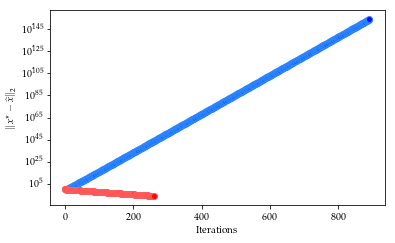

0.9


In [12]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# Setting 2
eta_GD = 1/L
eta_HB = 1/L
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

#Setting 3
eta_GD = 1/L
eta_HB = 1/L
beta = 1

#Setting 4
eta_GD = 0.1
eta_HB = 0.1
beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))

plt.plot(xs_GD, x_list_GD, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.plot(xs_HB, x_list_HB, '-o', color = '#FF6666', linewidth = 4, alpha = 0.7, markerfacecolor = 'r')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Nesterov acceleration

+ Acceleration #1: 

\begin{align}
\beta = \frac{\theta_t - 1}{\theta_{t+1}}, ~~\text{where}~~ \theta_0 = 1, ~\theta_{t+1} = \frac{1 + \sqrt{1 + 4\theta_t^2}}{2}
\end{align}

In [13]:
def Nesterov1(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    theta_cur = 1
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        theta_prev = theta_cur
        theta_cur = (1 + np.sqrt(1 + 4*theta_prev**2))/2
        beta = (theta_prev - 1)/theta_cur
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 1.2104208087616735
iter# = 1, ||x_new - x_old||_2 = 1.1287417485141047
iter# = 2, ||x_new - x_old||_2 = 1.3775275495438268
iter# = 3, ||x_new - x_old||_2 = 1.805518230632292
iter# = 4, ||x_new - x_old||_2 = 2.444864322584217
iter# = 5, ||x_new - x_old||_2 = 3.3722006594829805
iter# = 6, ||x_new - x_old||_2 = 4.706800401465975
iter# = 7, ||x_new - x_old||_2 = 6.624557345849534
iter# = 8, ||x_new - x_old||_2 = 9.381909186739366
iter# = 9, ||x_new - x_old||_2 = 13.351801921721165
iter# = 10, ||x_new - x_old||_2 = 19.076591109303568
iter# = 11, ||x_new - x_old||_2 = 27.34550749941281
iter# = 12, ||x_new - x_old||_2 = 39.30801294757236
iter# = 13, ||x_new - x_old||_2 = 56.639716715885164
iter# = 14, ||x_new - x_old||_2 = 81.78534762875219
iter# = 15, ||x_new - x_old||_2 = 118.31477359446684
iter# = 16, ||x_new - x_old||_2 = 171.44496755793472
iter# = 17, ||x_new - x_old||_2 = 248.80570025032546
iter# = 18, ||x_new - x_old||_2 = 361.5633720274706
iter# = 19, 

iter# = 194, ||x_new - x_old||_2 = 5.106247587066621e+32
iter# = 195, ||x_new - x_old||_2 = 7.609769652755038e+32
iter# = 196, ||x_new - x_old||_2 = 1.1340972328492275e+33
iter# = 197, ||x_new - x_old||_2 = 1.6902002506120403e+33
iter# = 198, ||x_new - x_old||_2 = 2.519040079692784e+33
iter# = 199, ||x_new - x_old||_2 = 3.754403894695513e+33
iter# = 200, ||x_new - x_old||_2 = 5.595718497704695e+33
iter# = 201, ||x_new - x_old||_2 = 8.340260808424755e+33
iter# = 202, ||x_new - x_old||_2 = 1.243117744421616e+34
iter# = 203, ||x_new - x_old||_2 = 1.8529073956701723e+34
iter# = 204, ||x_new - x_old||_2 = 2.761874456168555e+34
iter# = 205, ||x_new - x_old||_2 = 4.1168294550166766e+34
iter# = 206, ||x_new - x_old||_2 = 6.136637897302547e+34
iter# = 207, ||x_new - x_old||_2 = 9.147591304737187e+34
iter# = 208, ||x_new - x_old||_2 = 1.363614456472723e+35
iter# = 209, ||x_new - x_old||_2 = 2.0327547480715807e+35
iter# = 210, ||x_new - x_old||_2 = 3.0303086827269825e+35
iter# = 211, ||x_new - x_

iter# = 390, ||x_new - x_old||_2 = 6.21617555006442e+66
iter# = 391, ||x_new - x_old||_2 = 9.286648223963681e+66
iter# = 392, ||x_new - x_old||_2 = 1.387386606160421e+67
iter# = 393, ||x_new - x_old||_2 = 2.0727110507552136e+67
iter# = 394, ||x_new - x_old||_2 = 3.096583357409815e+67
iter# = 395, ||x_new - x_old||_2 = 4.626254487803035e+67
iter# = 396, ||x_new - x_old||_2 = 6.911606106257723e+67
iter# = 397, ||x_new - x_old||_2 = 1.0325976701984693e+68
iter# = 398, ||x_new - x_old||_2 = 1.5427160144304838e+68
iter# = 399, ||x_new - x_old||_2 = 2.3048544521097477e+68
iter# = 400, ||x_new - x_old||_2 = 3.443528480465118e+68
iter# = 401, ||x_new - x_old||_2 = 5.144776277968796e+68
iter# = 402, ||x_new - x_old||_2 = 7.686558475625679e+68
iter# = 403, ||x_new - x_old||_2 = 1.1484179943883943e+69
iter# = 404, ||x_new - x_old||_2 = 1.7158157092546454e+69
iter# = 405, ||x_new - x_old||_2 = 2.563562287095036e+69
iter# = 406, ||x_new - x_old||_2 = 3.830184350161918e+69
iter# = 407, ||x_new - x_o

iter# = 585, ||x_new - x_old||_2 = 6.727932812294236e+100
iter# = 586, ||x_new - x_old||_2 = 1.0059282343233319e+101
iter# = 587, ||x_new - x_old||_2 = 1.5040195932848964e+101
iter# = 588, ||x_new - x_old||_2 = 2.248749754693644e+101
iter# = 589, ||x_new - x_old||_2 = 3.362249197554977e+101
iter# = 590, ||x_new - x_old||_2 = 5.027126322427252e+101
iter# = 591, ||x_new - x_old||_2 = 7.516416268467154e+101
iter# = 592, ||x_new - x_old||_2 = 1.1238360797151353e+102
iter# = 593, ||x_new - x_old||_2 = 1.6803363956573233e+102
iter# = 594, ||x_new - x_old||_2 = 2.512410560655676e+102
iter# = 595, ||x_new - x_old||_2 = 3.756523364534956e+102
iter# = 596, ||x_new - x_old||_2 = 5.616718808750677e+102
iter# = 597, ||x_new - x_old||_2 = 8.398087000951775e+102
iter# = 598, ||x_new - x_old||_2 = 1.2556805051181864e+103
iter# = 599, ||x_new - x_old||_2 = 1.8774960187902554e+103
iter# = 600, ||x_new - x_old||_2 = 2.8072428492631853e+103
iter# = 601, ||x_new - x_old||_2 = 4.197416118652414e+103
iter# =

iter# = 786, ||x_new - x_old||_2 = 9.070745462132255e+135
iter# = 787, ||x_new - x_old||_2 = 1.3567118553264907e+136
iter# = 788, ||x_new - x_old||_2 = 2.0292370484991662e+136
iter# = 789, ||x_new - x_old||_2 = 3.0351381712419037e+136
iter# = 790, ||x_new - x_old||_2 = 4.5396740303512594e+136
iter# = 791, ||x_new - x_old||_2 = 6.790025258884332e+136
iter# = 792, ||x_new - x_old||_2 = 1.0155904899380341e+137
iter# = 793, ||x_new - x_old||_2 = 1.5190300822269934e+137
iter# = 794, ||x_new - x_old||_2 = 2.272033001288511e+137
iter# = 795, ||x_new - x_old||_2 = 3.3983132252077178e+137
iter# = 796, ||x_new - x_old||_2 = 5.0829130896295925e+137
iter# = 797, ||x_new - x_old||_2 = 7.602605725121865e+137
iter# = 798, ||x_new - x_old||_2 = 1.1371369114289759e+138
iter# = 799, ||x_new - x_old||_2 = 1.7008403407372364e+138
iter# = 800, ||x_new - x_old||_2 = 2.5439867179275656e+138
iter# = 801, ||x_new - x_old||_2 = 3.805104864314755e+138
iter# = 802, ||x_new - x_old||_2 = 5.6913974808334157e+138
it

iter# = 965, ||x_new - x_old||_2 = inf
iter# = 966, ||x_new - x_old||_2 = inf
iter# = 967, ||x_new - x_old||_2 = inf
iter# = 968, ||x_new - x_old||_2 = inf
iter# = 969, ||x_new - x_old||_2 = inf
iter# = 970, ||x_new - x_old||_2 = inf
iter# = 971, ||x_new - x_old||_2 = inf
iter# = 972, ||x_new - x_old||_2 = inf
iter# = 973, ||x_new - x_old||_2 = inf
iter# = 974, ||x_new - x_old||_2 = inf
iter# = 975, ||x_new - x_old||_2 = inf
iter# = 976, ||x_new - x_old||_2 = inf
iter# = 977, ||x_new - x_old||_2 = inf
iter# = 978, ||x_new - x_old||_2 = inf
iter# = 979, ||x_new - x_old||_2 = inf
iter# = 980, ||x_new - x_old||_2 = inf
iter# = 981, ||x_new - x_old||_2 = inf
iter# = 982, ||x_new - x_old||_2 = inf
iter# = 983, ||x_new - x_old||_2 = inf
iter# = 984, ||x_new - x_old||_2 = inf
iter# = 985, ||x_new - x_old||_2 = inf
iter# = 986, ||x_new - x_old||_2 = inf
iter# = 987, ||x_new - x_old||_2 = inf
iter# = 988, ||x_new - x_old||_2 = inf
iter# = 989, ||x_new - x_old||_2 = inf
iter# = 990, ||x_new - x_

iter# = 138, ||x_new - x_old||_2 = 0.0006305983817641076
iter# = 139, ||x_new - x_old||_2 = 0.0006075086110227355
iter# = 140, ||x_new - x_old||_2 = 0.0005772524586168009
iter# = 141, ||x_new - x_old||_2 = 0.0005397485015828668
iter# = 142, ||x_new - x_old||_2 = 0.0005197854073578692
iter# = 143, ||x_new - x_old||_2 = 0.0004838335432391697
iter# = 144, ||x_new - x_old||_2 = 0.00047647608486032947
iter# = 145, ||x_new - x_old||_2 = 0.0004306813733051437
iter# = 146, ||x_new - x_old||_2 = 0.0004230421274366246
iter# = 147, ||x_new - x_old||_2 = 0.00039682825499294874
iter# = 148, ||x_new - x_old||_2 = 0.0003725902119343389
iter# = 149, ||x_new - x_old||_2 = 0.0003654732526049117
iter# = 150, ||x_new - x_old||_2 = 0.0003306773122308681
iter# = 151, ||x_new - x_old||_2 = 0.0003254357714931388
iter# = 152, ||x_new - x_old||_2 = 0.0003025098932052146
iter# = 153, ||x_new - x_old||_2 = 0.00029321240679105163
iter# = 154, ||x_new - x_old||_2 = 0.0002716818832254945
iter# = 155, ||x_new - x_old

iter# = 51, ||x_new - x_old||_2 = 1.4905508447989756e+24
iter# = 52, ||x_new - x_old||_2 = 4.915550767516906e+24
iter# = 53, ||x_new - x_old||_2 = 1.6221884415568596e+25
iter# = 54, ||x_new - x_old||_2 = 5.357019368021387e+25
iter# = 55, ||x_new - x_old||_2 = 1.770221254114814e+26
iter# = 56, ||x_new - x_old||_2 = 5.853349340464366e+26
iter# = 57, ||x_new - x_old||_2 = 1.9366204771834474e+27
iter# = 58, ||x_new - x_old||_2 = 6.411192991580363e+27
iter# = 59, ||x_new - x_old||_2 = 2.1236304072494277e+28
iter# = 60, ||x_new - x_old||_2 = 7.038120062582521e+28
iter# = 61, ||x_new - x_old||_2 = 2.333803732046236e+29
iter# = 62, ||x_new - x_old||_2 = 7.742737506690499e+29
iter# = 63, ||x_new - x_old||_2 = 2.570042150853586e+30
iter# = 64, ||x_new - x_old||_2 = 8.534827153686953e+30
iter# = 65, ||x_new - x_old||_2 = 2.8356430051282117e+31
iter# = 66, ||x_new - x_old||_2 = 9.425503593826455e+31
iter# = 67, ||x_new - x_old||_2 = 3.134352717714482e+32
iter# = 68, ||x_new - x_old||_2 = 1.0427395

iter# = 224, ||x_new - x_old||_2 = 2.435078834503108e+115
iter# = 225, ||x_new - x_old||_2 = 8.266269528083367e+115
iter# = 226, ||x_new - x_old||_2 = 2.8062450701547717e+116
iter# = 227, ||x_new - x_old||_2 = 9.527105757070355e+116
iter# = 228, ||x_new - x_old||_2 = 3.234562853720769e+117
iter# = 229, ||x_new - x_old||_2 = 1.0982198347262468e+118
iter# = 230, ||x_new - x_old||_2 = 3.7289101166083703e+118
iter# = 231, ||x_new - x_old||_2 = 1.266173895336475e+119
iter# = 232, ||x_new - x_old||_2 = 4.2995546228892294e+119
iter# = 233, ||x_new - x_old||_2 = 1.460064792609792e+120
iter# = 234, ||x_new - x_old||_2 = 4.9583730505079943e+120
iter# = 235, ||x_new - x_old||_2 = 1.683932001762273e+121
iter# = 236, ||x_new - x_old||_2 = 5.719104820055208e+121
iter# = 237, ||x_new - x_old||_2 = 1.942448840534281e+122
iter# = 238, ||x_new - x_old||_2 = 6.59764621290505e+122
iter# = 239, ||x_new - x_old||_2 = 2.241022591091593e+123
iter# = 240, ||x_new - x_old||_2 = 7.612391208802953e+123
iter# = 24

iter# = 569, ||x_new - x_old||_2 = inf
iter# = 570, ||x_new - x_old||_2 = inf
iter# = 571, ||x_new - x_old||_2 = inf
iter# = 572, ||x_new - x_old||_2 = inf
iter# = 573, ||x_new - x_old||_2 = inf
iter# = 574, ||x_new - x_old||_2 = inf
iter# = 575, ||x_new - x_old||_2 = inf
iter# = 576, ||x_new - x_old||_2 = inf
iter# = 577, ||x_new - x_old||_2 = inf
iter# = 578, ||x_new - x_old||_2 = inf
iter# = 579, ||x_new - x_old||_2 = inf
iter# = 580, ||x_new - x_old||_2 = inf
iter# = 581, ||x_new - x_old||_2 = inf
iter# = 582, ||x_new - x_old||_2 = inf
iter# = 583, ||x_new - x_old||_2 = inf
iter# = 584, ||x_new - x_old||_2 = inf
iter# = 585, ||x_new - x_old||_2 = inf
iter# = 586, ||x_new - x_old||_2 = inf
iter# = 587, ||x_new - x_old||_2 = nan
iter# = 588, ||x_new - x_old||_2 = nan
iter# = 589, ||x_new - x_old||_2 = nan
iter# = 590, ||x_new - x_old||_2 = nan
iter# = 591, ||x_new - x_old||_2 = nan
iter# = 592, ||x_new - x_old||_2 = nan
iter# = 593, ||x_new - x_old||_2 = nan
iter# = 594, ||x_new - x_

iter# = 925, ||x_new - x_old||_2 = nan
iter# = 926, ||x_new - x_old||_2 = nan
iter# = 927, ||x_new - x_old||_2 = nan
iter# = 928, ||x_new - x_old||_2 = nan
iter# = 929, ||x_new - x_old||_2 = nan
iter# = 930, ||x_new - x_old||_2 = nan
iter# = 931, ||x_new - x_old||_2 = nan
iter# = 932, ||x_new - x_old||_2 = nan
iter# = 933, ||x_new - x_old||_2 = nan
iter# = 934, ||x_new - x_old||_2 = nan
iter# = 935, ||x_new - x_old||_2 = nan
iter# = 936, ||x_new - x_old||_2 = nan
iter# = 937, ||x_new - x_old||_2 = nan
iter# = 938, ||x_new - x_old||_2 = nan
iter# = 939, ||x_new - x_old||_2 = nan
iter# = 940, ||x_new - x_old||_2 = nan
iter# = 941, ||x_new - x_old||_2 = nan
iter# = 942, ||x_new - x_old||_2 = nan
iter# = 943, ||x_new - x_old||_2 = nan
iter# = 944, ||x_new - x_old||_2 = nan
iter# = 945, ||x_new - x_old||_2 = nan
iter# = 946, ||x_new - x_old||_2 = nan
iter# = 947, ||x_new - x_old||_2 = nan
iter# = 948, ||x_new - x_old||_2 = nan
iter# = 949, ||x_new - x_old||_2 = nan
iter# = 950, ||x_new - x_

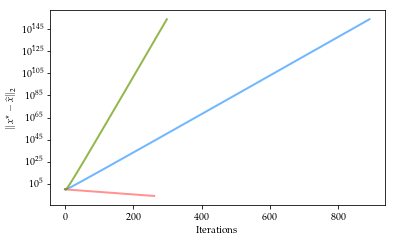

0.9


In [21]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
eta_Nest = 1/L

# Setting 2
eta_GD = 1/L
eta_HB = 1/L
eta_Nest = 1/L
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# Setting 3
eta_GD = 1/L
eta_HB = 1/L
eta_Nest = 1/L
beta = 0.9

# Setting 4
eta_GD = 0.1
eta_HB = 0.1
eta_Nest = 0.1
beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

#### Some observations

+ The curve has ripples: Actually, Nesterov's method is not a descent method (i.e., it does not guarantee that *per iteration* the distance to the optimum (and the function values) should drop)
+ Nesterov's method is hyper-parameter free: you don't have to worry about how to set up the momentum parameter.
+ It actually works (even in theory) beyond strongly convex functions: we presented a theorem for the Heavy Ball method that shows acceleration, but assumes strong convexity (as well as knowing many parameters such as Lipschitz gradient continuity, strong convexity). Nesterov's method requires only the knowledge of the Lipschitz gradient continuity (which is the easiest to learn - why?)

In [22]:
def Nesterov2(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        beta = i / (i + 3)
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.48416832350466954
iter# = 1, ||x_new - x_old||_2 = 0.18012194843253215
iter# = 2, ||x_new - x_old||_2 = 0.10514026602695259
iter# = 3, ||x_new - x_old||_2 = 0.0715424938837568
iter# = 4, ||x_new - x_old||_2 = 0.0530666714547636
iter# = 5, ||x_new - x_old||_2 = 0.04160201476761653
iter# = 6, ||x_new - x_old||_2 = 0.03386485434137663
iter# = 7, ||x_new - x_old||_2 = 0.028312492884092266
iter# = 8, ||x_new - x_old||_2 = 0.02414208631973417
iter# = 9, ||x_new - x_old||_2 = 0.020900251401825675
iter# = 10, ||x_new - x_old||_2 = 0.018312694881518234
iter# = 11, ||x_new - x_old||_2 = 0.016203614977490472
iter# = 12, ||x_new - x_old||_2 = 0.014454883830395974
iter# = 13, ||x_new - x_old||_2 = 0.012984044616790593
iter# = 14, ||x_new - x_old||_2 = 0.011731747711989081
iter# = 15, ||x_new - x_old||_2 = 0.010654196067284821
iter# = 16, ||x_new - x_old||_2 = 0.009718394085747723
iter# = 17, ||x_new - x_old||_2 = 0.008899043916974209
iter# = 18, ||x_new - x_old||_

iter# = 191, ||x_new - x_old||_2 = 1.6467106353569604e-06
iter# = 192, ||x_new - x_old||_2 = 1.5751325409471982e-06
iter# = 193, ||x_new - x_old||_2 = 1.5066805161631453e-06
iter# = 194, ||x_new - x_old||_2 = 1.4412172594553457e-06
iter# = 195, ||x_new - x_old||_2 = 1.3786115417198978e-06
iter# = 196, ||x_new - x_old||_2 = 1.3187379353564476e-06
iter# = 197, ||x_new - x_old||_2 = 1.2614765556410164e-06
iter# = 198, ||x_new - x_old||_2 = 1.2067128136197831e-06
iter# = 199, ||x_new - x_old||_2 = 1.1543371802728523e-06
iter# = 200, ||x_new - x_old||_2 = 1.1042449611962974e-06
iter# = 201, ||x_new - x_old||_2 = 1.0563360814965642e-06
iter# = 202, ||x_new - x_old||_2 = 1.010514880278566e-06
Number of steps: 204
iter# = 0, ||x_new - x_old||_2 = 0.48416832350466954
iter# = 1, ||x_new - x_old||_2 = 0.46722090710558173
iter# = 2, ||x_new - x_old||_2 = 0.2574619668637558
iter# = 3, ||x_new - x_old||_2 = 0.23819591410999555
iter# = 4, ||x_new - x_old||_2 = 0.2039600247347711
iter# = 5, ||x_new - 

iter# = 124, ||x_new - x_old||_2 = 2.6797105674339506e-05
iter# = 125, ||x_new - x_old||_2 = 2.376912399637351e-05
iter# = 126, ||x_new - x_old||_2 = 2.0772660825783573e-05
iter# = 127, ||x_new - x_old||_2 = 1.817840219987063e-05
iter# = 128, ||x_new - x_old||_2 = 1.6375875429146605e-05
iter# = 129, ||x_new - x_old||_2 = 1.5631420988857266e-05
iter# = 130, ||x_new - x_old||_2 = 1.590221836408311e-05
iter# = 131, ||x_new - x_old||_2 = 1.684050472417274e-05
iter# = 132, ||x_new - x_old||_2 = 1.8010080506295575e-05
iter# = 133, ||x_new - x_old||_2 = 1.9058868143519166e-05
iter# = 134, ||x_new - x_old||_2 = 1.975885973886934e-05
iter# = 135, ||x_new - x_old||_2 = 1.998650086193602e-05
iter# = 136, ||x_new - x_old||_2 = 1.9696736512601174e-05
iter# = 137, ||x_new - x_old||_2 = 1.8904108613906728e-05
iter# = 138, ||x_new - x_old||_2 = 1.7670760952039446e-05
iter# = 139, ||x_new - x_old||_2 = 1.6099644491247215e-05
iter# = 140, ||x_new - x_old||_2 = 1.4332129069147173e-05
iter# = 141, ||x_new

iter# = 103, ||x_new - x_old||_2 = 4.992150060694057e-05
iter# = 104, ||x_new - x_old||_2 = 5.192152859385967e-05
iter# = 105, ||x_new - x_old||_2 = 5.271303912158865e-05
iter# = 106, ||x_new - x_old||_2 = 5.2149600481396715e-05
iter# = 107, ||x_new - x_old||_2 = 5.025232984723401e-05
iter# = 108, ||x_new - x_old||_2 = 4.716944525317818e-05
iter# = 109, ||x_new - x_old||_2 = 4.31519045909949e-05
iter# = 110, ||x_new - x_old||_2 = 3.854159261758753e-05
iter# = 111, ||x_new - x_old||_2 = 3.377044636255379e-05
iter# = 112, ||x_new - x_old||_2 = 2.9363685827931857e-05
iter# = 113, ||x_new - x_old||_2 = 2.5914091137528632e-05
iter# = 114, ||x_new - x_old||_2 = 2.3944668037853676e-05
iter# = 115, ||x_new - x_old||_2 = 2.3625781045047277e-05
iter# = 116, ||x_new - x_old||_2 = 2.460822913318499e-05
iter# = 117, ||x_new - x_old||_2 = 2.6243868893147942e-05
iter# = 118, ||x_new - x_old||_2 = 2.7922721669579342e-05
iter# = 119, ||x_new - x_old||_2 = 2.9217310549297956e-05
iter# = 120, ||x_new - x

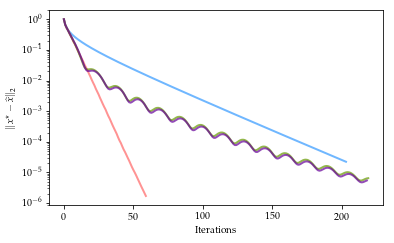

0.6400000000000001


In [24]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
eta_Nest = 1/L

# Setting 2
eta_GD = 1/L
eta_HB = 1/L
eta_Nest = 1/L
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# # Setting 3
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = 0.9

# # Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# eta_Nest = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_Nest, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

In [25]:
def Nesterov3(y, A, eta, L, mu, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.9310929298166722
iter# = 1, ||x_new - x_old||_2 = 0.5108232212028586
iter# = 2, ||x_new - x_old||_2 = 0.37762310547075156
iter# = 3, ||x_new - x_old||_2 = 0.30186308978879245
iter# = 4, ||x_new - x_old||_2 = 0.24979329771659964
iter# = 5, ||x_new - x_old||_2 = 0.2107656841404538
iter# = 6, ||x_new - x_old||_2 = 0.18008256662948974
iter# = 7, ||x_new - x_old||_2 = 0.15523702015087748
iter# = 8, ||x_new - x_old||_2 = 0.1347155377337402
iter# = 9, ||x_new - x_old||_2 = 0.11752314635121139
iter# = 10, ||x_new - x_old||_2 = 0.10296484835821532
iter# = 11, ||x_new - x_old||_2 = 0.09053322874232284
iter# = 12, ||x_new - x_old||_2 = 0.07984538927459015
iter# = 13, ||x_new - x_old||_2 = 0.07060499104889224
iter# = 14, ||x_new - x_old||_2 = 0.06257807696351358
iter# = 15, ||x_new - x_old||_2 = 0.05557694985787117
iter# = 16, ||x_new - x_old||_2 = 0.04944901675438786
iter# = 17, ||x_new - x_old||_2 = 0.04406883360706948
iter# = 18, ||x_new - x_old||_2 = 0.039332

iter# = 22, ||x_new - x_old||_2 = 127441.01096276843
iter# = 23, ||x_new - x_old||_2 = 263595.36254996824
iter# = 24, ||x_new - x_old||_2 = 546953.0575771083
iter# = 25, ||x_new - x_old||_2 = 1138267.472087909
iter# = 26, ||x_new - x_old||_2 = 2375362.536543449
iter# = 27, ||x_new - x_old||_2 = 4969647.628525076
iter# = 28, ||x_new - x_old||_2 = 10422175.635176148
iter# = 29, ||x_new - x_old||_2 = 21905962.31113769
iter# = 30, ||x_new - x_old||_2 = 46140007.83676085
iter# = 31, ||x_new - x_old||_2 = 97375563.83745398
iter# = 32, ||x_new - x_old||_2 = 205887345.67426267
iter# = 33, ||x_new - x_old||_2 = 436085062.69000655
iter# = 34, ||x_new - x_old||_2 = 925194205.7666295
iter# = 35, ||x_new - x_old||_2 = 1965967291.7714195
iter# = 36, ||x_new - x_old||_2 = 4183751378.5682507
iter# = 37, ||x_new - x_old||_2 = 8915974124.488714
iter# = 38, ||x_new - x_old||_2 = 19026312194.1543
iter# = 39, ||x_new - x_old||_2 = 40653226172.02251
iter# = 40, ||x_new - x_old||_2 = 86968830940.14317
iter# 

iter# = 216, ||x_new - x_old||_2 = 2.2280707507702157e+71
iter# = 217, ||x_new - x_old||_2 = 4.960461554239665e+71
iter# = 218, ||x_new - x_old||_2 = 1.1044272216290614e+72
iter# = 219, ||x_new - x_old||_2 = 2.4590867434817366e+72
iter# = 220, ||x_new - x_old||_2 = 5.475605561686701e+72
iter# = 221, ||x_new - x_old||_2 = 1.219303599158505e+73
iter# = 222, ||x_new - x_old||_2 = 2.715268497938135e+73
iter# = 223, ||x_new - x_old||_2 = 6.046927566708513e+73
iter# = 224, ||x_new - x_old||_2 = 1.3467210494091316e+74
iter# = 225, ||x_new - x_old||_2 = 2.999447497588439e+74
iter# = 226, ||x_new - x_old||_2 = 6.680753602638263e+74
iter# = 227, ||x_new - x_old||_2 = 1.4880929517778014e+75
iter# = 228, ||x_new - x_old||_2 = 3.3147816238406096e+75
iter# = 229, ||x_new - x_old||_2 = 7.38413941006036e+75
iter# = 230, ||x_new - x_old||_2 = 1.6449958247615527e+76
iter# = 231, ||x_new - x_old||_2 = 3.6647934915532256e+76
iter# = 232, ||x_new - x_old||_2 = 8.164956186849925e+76
iter# = 233, ||x_new - x

iter# = 401, ||x_new - x_old||_2 = 7.997423131177367e+135
iter# = 402, ||x_new - x_old||_2 = 1.789811006029078e+136
iter# = 403, ||x_new - x_old||_2 = 4.0056297755133436e+136
iter# = 404, ||x_new - x_old||_2 = 8.964806871945573e+136
iter# = 405, ||x_new - x_old||_2 = 2.0064000738661935e+137
iter# = 406, ||x_new - x_old||_2 = 4.490560636240547e+137
iter# = 407, ||x_new - x_old||_2 = 1.0050553856277152e+138
iter# = 408, ||x_new - x_old||_2 = 2.2494989397308277e+138
iter# = 409, ||x_new - x_old||_2 = 5.034866109286516e+138
iter# = 410, ||x_new - x_old||_2 = 1.12692850090498e+139
iter# = 411, ||x_new - x_old||_2 = 2.5223832349085784e+139
iter# = 412, ||x_new - x_old||_2 = 5.645884899272236e+139
iter# = 413, ||x_new - x_old||_2 = 1.2637442079566312e+140
iter# = 414, ||x_new - x_old||_2 = 2.8287366304102673e+140
iter# = 415, ||x_new - x_old||_2 = 6.331870120025128e+140
iter# = 416, ||x_new - x_old||_2 = 1.4173516008353958e+141
iter# = 417, ||x_new - x_old||_2 = 3.172702024998266e+141
iter# =

iter# = 762, ||x_new - x_old||_2 = inf
iter# = 763, ||x_new - x_old||_2 = inf
iter# = 764, ||x_new - x_old||_2 = inf
iter# = 765, ||x_new - x_old||_2 = inf
iter# = 766, ||x_new - x_old||_2 = inf
iter# = 767, ||x_new - x_old||_2 = inf
iter# = 768, ||x_new - x_old||_2 = inf
iter# = 769, ||x_new - x_old||_2 = inf
iter# = 770, ||x_new - x_old||_2 = inf
iter# = 771, ||x_new - x_old||_2 = inf
iter# = 772, ||x_new - x_old||_2 = inf
iter# = 773, ||x_new - x_old||_2 = inf
iter# = 774, ||x_new - x_old||_2 = inf
iter# = 775, ||x_new - x_old||_2 = inf
iter# = 776, ||x_new - x_old||_2 = inf
iter# = 777, ||x_new - x_old||_2 = inf
iter# = 778, ||x_new - x_old||_2 = inf
iter# = 779, ||x_new - x_old||_2 = inf
iter# = 780, ||x_new - x_old||_2 = inf
iter# = 781, ||x_new - x_old||_2 = inf
iter# = 782, ||x_new - x_old||_2 = inf
iter# = 783, ||x_new - x_old||_2 = inf
iter# = 784, ||x_new - x_old||_2 = inf
iter# = 785, ||x_new - x_old||_2 = inf
iter# = 786, ||x_new - x_old||_2 = inf
iter# = 787, ||x_new - x_

iter# = 102, ||x_new - x_old||_2 = 6.412232512117939e+31
iter# = 103, ||x_new - x_old||_2 = 1.4121586470386528e+32
iter# = 104, ||x_new - x_old||_2 = 3.1105505413696394e+32
iter# = 105, ||x_new - x_old||_2 = 6.852816957109892e+32
iter# = 106, ||x_new - x_old||_2 = 1.510002597168757e+33
iter# = 107, ||x_new - x_old||_2 = 3.327833498237226e+33
iter# = 108, ||x_new - x_old||_2 = 7.335327290310146e+33
iter# = 109, ||x_new - x_old||_2 = 1.6171493658018191e+34
iter# = 110, ||x_new - x_old||_2 = 3.5657612592394383e+34
iter# = 111, ||x_new - x_old||_2 = 7.863658990054592e+34
iter# = 112, ||x_new - x_old||_2 = 1.7344676030834875e+35
iter# = 113, ||x_new - x_old||_2 = 3.8262706425489985e+35
iter# = 114, ||x_new - x_old||_2 = 8.442130203749646e+35
iter# = 115, ||x_new - x_old||_2 = 1.8629199738171118e+36
iter# = 116, ||x_new - x_old||_2 = 4.111507628313214e+36
iter# = 117, ||x_new - x_old||_2 = 9.075524509610349e+36
iter# = 118, ||x_new - x_old||_2 = 2.003572730109369e+37
iter# = 119, ||x_new - x

iter# = 277, ||x_new - x_old||_2 = 2.83027770282395e+92
iter# = 278, ||x_new - x_old||_2 = 6.316500680734993e+92
iter# = 279, ||x_new - x_old||_2 = 1.4097369303229096e+93
iter# = 280, ||x_new - x_old||_2 = 3.1463971526818093e+93
iter# = 281, ||x_new - x_old||_2 = 7.02267936072751e+93
iter# = 282, ||x_new - x_old||_2 = 1.5674939704730852e+94
iter# = 283, ||x_new - x_old||_2 = 3.498827741863856e+94
iter# = 284, ||x_new - x_old||_2 = 7.810031618900021e+94
iter# = 285, ||x_new - x_old||_2 = 1.7433977335660996e+95
iter# = 286, ||x_new - x_old||_2 = 3.89182696496057e+95
iter# = 287, ||x_new - x_old||_2 = 8.688080510991848e+95
iter# = 288, ||x_new - x_old||_2 = 1.9395783480597384e+96
iter# = 289, ||x_new - x_old||_2 = 4.330159597815532e+96
iter# = 290, ||x_new - x_old||_2 = 9.667484297515323e+96
iter# = 291, ||x_new - x_old||_2 = 2.158419984567267e+97
iter# = 292, ||x_new - x_old||_2 = 4.819158933366399e+97
iter# = 293, ||x_new - x_old||_2 = 1.0760173532743319e+98
iter# = 294, ||x_new - x_old

iter# = 450, ||x_new - x_old||_2 = 8.25992261794286e+152
iter# = 451, ||x_new - x_old||_2 = 1.849737441287949e+153
iter# = 452, ||x_new - x_old||_2 = 4.142374730372267e+153
iter# = 453, ||x_new - x_old||_2 = 9.276707096699734e+153
iter# = 454, ||x_new - x_old||_2 = inf
iter# = 455, ||x_new - x_old||_2 = inf
iter# = 456, ||x_new - x_old||_2 = inf
iter# = 457, ||x_new - x_old||_2 = inf
iter# = 458, ||x_new - x_old||_2 = inf
iter# = 459, ||x_new - x_old||_2 = inf
iter# = 460, ||x_new - x_old||_2 = inf
iter# = 461, ||x_new - x_old||_2 = inf
iter# = 462, ||x_new - x_old||_2 = inf
iter# = 463, ||x_new - x_old||_2 = inf
iter# = 464, ||x_new - x_old||_2 = inf
iter# = 465, ||x_new - x_old||_2 = inf
iter# = 466, ||x_new - x_old||_2 = inf
iter# = 467, ||x_new - x_old||_2 = inf
iter# = 468, ||x_new - x_old||_2 = inf
iter# = 469, ||x_new - x_old||_2 = inf
iter# = 470, ||x_new - x_old||_2 = inf
iter# = 471, ||x_new - x_old||_2 = inf
iter# = 472, ||x_new - x_old||_2 = inf
iter# = 473, ||x_new - x_old

iter# = 798, ||x_new - x_old||_2 = inf
iter# = 799, ||x_new - x_old||_2 = inf
iter# = 800, ||x_new - x_old||_2 = inf
iter# = 801, ||x_new - x_old||_2 = inf
iter# = 802, ||x_new - x_old||_2 = inf
iter# = 803, ||x_new - x_old||_2 = inf
iter# = 804, ||x_new - x_old||_2 = inf
iter# = 805, ||x_new - x_old||_2 = inf
iter# = 806, ||x_new - x_old||_2 = inf
iter# = 807, ||x_new - x_old||_2 = inf
iter# = 808, ||x_new - x_old||_2 = inf
iter# = 809, ||x_new - x_old||_2 = inf
iter# = 810, ||x_new - x_old||_2 = inf
iter# = 811, ||x_new - x_old||_2 = inf
iter# = 812, ||x_new - x_old||_2 = inf
iter# = 813, ||x_new - x_old||_2 = inf
iter# = 814, ||x_new - x_old||_2 = inf
iter# = 815, ||x_new - x_old||_2 = inf
iter# = 816, ||x_new - x_old||_2 = inf
iter# = 817, ||x_new - x_old||_2 = inf
iter# = 818, ||x_new - x_old||_2 = inf
iter# = 819, ||x_new - x_old||_2 = inf
iter# = 820, ||x_new - x_old||_2 = inf
iter# = 821, ||x_new - x_old||_2 = inf
iter# = 822, ||x_new - x_old||_2 = inf
iter# = 823, ||x_new - x_

iter# = 154, ||x_new - x_old||_2 = 1.7393324848485175e+40
iter# = 155, ||x_new - x_old||_2 = 3.2242081760334403e+40
iter# = 156, ||x_new - x_old||_2 = 5.976894767706239e+40
iter# = 157, ||x_new - x_old||_2 = 1.108000972523959e+41
iter# = 158, ||x_new - x_old||_2 = 2.054076443073274e+41
iter# = 159, ||x_new - x_old||_2 = 3.808069993719468e+41
iter# = 160, ||x_new - x_old||_2 = 7.060005429857968e+41
iter# = 161, ||x_new - x_old||_2 = 1.3089313625285136e+42
iter# = 162, ||x_new - x_old||_2 = 2.426835685056045e+42
iter# = 163, ||x_new - x_old||_2 = 4.4996161396474757e+42
iter# = 164, ||x_new - x_old||_2 = 8.342997048061963e+42
iter# = 165, ||x_new - x_old||_2 = 1.5469639058301615e+43
iter# = 166, ||x_new - x_old||_2 = 2.868465793295692e+43
iter# = 167, ||x_new - x_old||_2 = 5.319006376224105e+43
iter# = 168, ||x_new - x_old||_2 = 9.863308701434307e+43
iter# = 169, ||x_new - x_old||_2 = 1.829051604032001e+44
iter# = 170, ||x_new - x_old||_2 = 3.3918797596191932e+44
iter# = 171, ||x_new - x_

iter# = 324, ||x_new - x_old||_2 = 8.62975405863873e+85
iter# = 325, ||x_new - x_old||_2 = 1.6044819910214987e+86
iter# = 326, ||x_new - x_old||_2 = 2.983152124600994e+86
iter# = 327, ||x_new - x_old||_2 = 5.546513219785685e+86
iter# = 328, ||x_new - x_old||_2 = 1.0312614299262288e+87
iter# = 329, ||x_new - x_old||_2 = 1.9174389330097673e+87
iter# = 330, ||x_new - x_old||_2 = 3.5651542467905666e+87
iter# = 331, ||x_new - x_old||_2 = 6.628863825753503e+87
iter# = 332, ||x_new - x_old||_2 = 1.2325479804142228e+88
iter# = 333, ||x_new - x_old||_2 = 2.2917778030398336e+88
iter# = 334, ||x_new - x_old||_2 = 4.261329284497582e+88
iter# = 335, ||x_new - x_old||_2 = 7.92358217298509e+88
iter# = 336, ||x_new - x_old||_2 = 1.4733363302891403e+89
iter# = 337, ||x_new - x_old||_2 = 2.7395931066801814e+89
iter# = 338, ||x_new - x_old||_2 = 5.09417712470039e+89
iter# = 339, ||x_new - x_old||_2 = 9.472525930636533e+89
iter# = 340, ||x_new - x_old||_2 = 1.7614135162112368e+90
iter# = 341, ||x_new - x_

iter# = 500, ||x_new - x_old||_2 = 2.427517367855606e+133
iter# = 501, ||x_new - x_old||_2 = 4.518062796101725e+133
iter# = 502, ||x_new - x_old||_2 = 8.408988904360393e+133
iter# = 503, ||x_new - x_old||_2 = 1.5650812502514945e+134
iter# = 504, ||x_new - x_old||_2 = 2.9129402966520402e+134
iter# = 505, ||x_new - x_old||_2 = 5.421604799963891e+134
iter# = 506, ||x_new - x_old||_2 = 1.0090802422414206e+135
iter# = 507, ||x_new - x_old||_2 = 1.878127680997269e+135
iter# = 508, ||x_new - x_old||_2 = 3.495635030988879e+135
iter# = 509, ||x_new - x_old||_2 = 6.506217896293101e+135
iter# = 510, ||x_new - x_old||_2 = 1.2109680082219799e+136
iter# = 511, ||x_new - x_old||_2 = 2.2539188432591502e+136
iter# = 512, ||x_new - x_old||_2 = 4.1951298758026337e+136
iter# = 513, ||x_new - x_old||_2 = 7.808256510160507e+136
iter# = 514, ||x_new - x_old||_2 = 1.4533300453574805e+137
iter# = 515, ||x_new - x_old||_2 = 2.7050540312695285e+137
iter# = 516, ||x_new - x_old||_2 = 5.034880207842857e+137
iter# 

iter# = 677, ||x_new - x_old||_2 = inf
iter# = 678, ||x_new - x_old||_2 = inf
iter# = 679, ||x_new - x_old||_2 = inf
iter# = 680, ||x_new - x_old||_2 = inf
iter# = 681, ||x_new - x_old||_2 = inf
iter# = 682, ||x_new - x_old||_2 = inf
iter# = 683, ||x_new - x_old||_2 = inf
iter# = 684, ||x_new - x_old||_2 = inf
iter# = 685, ||x_new - x_old||_2 = inf
iter# = 686, ||x_new - x_old||_2 = inf
iter# = 687, ||x_new - x_old||_2 = inf
iter# = 688, ||x_new - x_old||_2 = inf
iter# = 689, ||x_new - x_old||_2 = inf
iter# = 690, ||x_new - x_old||_2 = inf
iter# = 691, ||x_new - x_old||_2 = inf
iter# = 692, ||x_new - x_old||_2 = inf
iter# = 693, ||x_new - x_old||_2 = inf
iter# = 694, ||x_new - x_old||_2 = inf
iter# = 695, ||x_new - x_old||_2 = inf
iter# = 696, ||x_new - x_old||_2 = inf
iter# = 697, ||x_new - x_old||_2 = inf
iter# = 698, ||x_new - x_old||_2 = inf
iter# = 699, ||x_new - x_old||_2 = inf
iter# = 700, ||x_new - x_old||_2 = inf
iter# = 701, ||x_new - x_old||_2 = inf
iter# = 702, ||x_new - x_

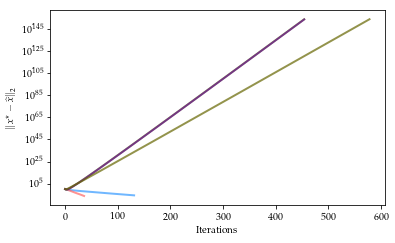

0.44444444444444453


In [27]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# Setting 1
eta_GD = 2/(L + mu)
eta_HB = 4/(np.sqrt(L) + np.sqrt(mu))**2
beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2
eta_Nest = 2/(L + mu)

# # Setting 2
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = max(np.abs(1 - np.sqrt(eta_HB * mu)), np.abs(1 - np.sqrt(eta_HB * L)))**2

# # Setting 3
# eta_GD = 1/L
# eta_HB = 1/L
# eta_Nest = 1/L
# beta = 0.9

# # Setting 4
# eta_GD = 0.1
# eta_HB = 0.1
# eta_Nest = 0.1
# beta = 0.9

x_GD, x_list_GD, f_list_GD = GD(y, A, eta_GD, iters, epsilon, True, x_star)
x_HB, x_list_HB, f_list_HB = HB(y, A, eta_HB, beta, iters, epsilon, True, x_star)
eta_GD = 1/L
x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_Nest, iters, epsilon, True, x_star)
x_Nest3, x_list_Nest3, f_list_Nest3 = Nesterov3(y, A, eta_Nest, L, mu, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD = range(len(x_list_GD))
xs_HB = range(len(x_list_HB))
xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))
xs_Nest3 = range(len(x_list_Nest3))

plt.plot(xs_GD, x_list_GD, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.plot(xs_Nest3, x_list_Nest3, '-', color = '#666600', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

print(beta)

### Noise tolerance in acceleration

Let us first describe a very simple case (actually we have already described a very similar case above) on top of which we will build some intuition for the result we discussed just now.
Consider the minimization of a smooth convex function 
$f\colon \mathbb{R}^n\rightarrow\mathbb{R}$ defined as:

$$
\displaystyle f(x) = \frac{1}{2} x^\top A x - b^\top x.
$$
Here, $A$ is a positive semidefinite matrix with $n \times n$ dimensions, and $b \in \mathbb{R}^n$, both given.
One can easy compute that:
$$
\nabla f(x) = Ax - b
$$

For the purpose of this example, we will consider the case of a Laplacian cycle graph:
$$
A = \begin{bmatrix} 2 & -1 & 0 & 0 & 0 & \cdots & -1 \\ 
                   -1 & 2 & -1 & 0 & 0 & \cdots & 0 \\ 
                   0 & -1 & 2 & -1 & 0 & \cdots & 0 \\ 
                   \vdots & & & \ddots & & \vdots & \vdots
    \end{bmatrix}
$$

By definition, since $A$ is PSD, the problem is convex. 
Moreover, by definition of $A$ it is not hard to see that the function satisfies Lipschitz gradient continuity with constaint $L = 4$.

Let us do the following experiment then:

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def GD(init, grad, L = 1, iters = 100):
    x_cur = init
    x_list = [init]
    for t in range(0, iters):
        x_cur = x_cur - (1/L)*grad(x_cur)
        x_list.append(x_cur)
    return x_list

def AccGD(init, grad, L = 1, iters = 100):
    x_cur = init
    y_cur = init
    x_list = [init]
    theta = 1
    for t in range(0, iters):
        theta = 0.5 * (1.0 + np.sqrt(1+4.0*theta**2))
        theta2 = 0.5 * (1.0 + np.sqrt(1+4.0*theta**2))
        beta = (theta - 1)/theta2
        y2 = x_cur - (1/L) * grad(x_cur)
        x_cur = y2 + beta * (y2 - y_cur)
        y_cur = y2
        x_list.append(x_cur)
    return x_list

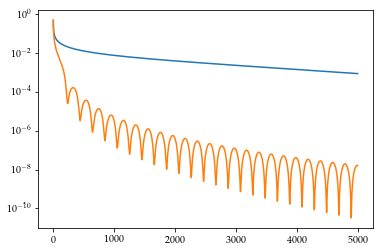

In [29]:
n = 100
B = np.zeros((n,n))
for i in range(1,n-1):
    B[i,i+1] = 1
    B[i,i-1] = 1
B[0,1] = 1
B[n-1,n-2] = 1
A = 2.0*np.eye(n) - B
b = np.zeros(n)
b[0] = 1
opt = np.dot(np.linalg.pinv(A),b)

def f(x):
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(x,b)
                                
def grad(x):
    return np.dot(A,x) - b

f_star = f(opt)

iters = 5000

xs3 = GD(np.zeros(n), grad, 4, iters)
ys3 = [ abs(f(xs3[i])-f_star) for i in range(0, iters) ]
xs3acc = AccGD(np.zeros(n), grad, 4, iters)
ys3acc = [ abs(f(xs3acc[i])-f_star) for i in range(0, iters) ]

plt.yscale('log')
plt.plot(range(0,iters), ys3, range(0,iters), ys3acc)

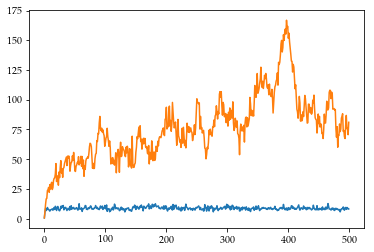

In [34]:
def noisygrad(x):
    return np.dot(A,x) - b + np.random.normal(0,1,(n))

iters = 500

xs3 = GD(np.zeros(n), noisygrad, 4, iters)
ys3 = [ abs(f(xs3[i])-f_star) for i in range(0, iters) ]
xs3acc = AccGD(np.zeros(n), noisygrad, 4, iters)
ys3acc = [ abs(f(xs3acc[i])-f_star) for i in range(0, iters) ]

plt.yscale('linear')
plt.plot(range(0, iters), ys3, range(0, iters), ys3acc)